In [81]:
import pandas as pd
import numpy as np
from docx import Document
import matplotlib.pyplot as plt

SuperProcure


Instructions : 
Read the instructions carefully.
Questions are divided into two parts (A & B)
Respond to a minimum of three questions, with the flexibility to answer more.
Choose at least two questions from Part A and at least one from Part B.
Objective of this task is to understand your ability to analyse datasets and being able to articulate your findings in a meaningful, actionable way.


PART -A

Is there a noticeable correlation between specific customers and suppliers, and if so, how does this relationship manifest in terms of trip performance metrics?

Based on the analysis of dataset given, can you develop a forecast for demand pattern, over the next 3 months?

Explore the dataset for any unusual patterns or outliers in trip data. How would you approach identifying and handling outliers, and what potential impact might they have on the analysis?



PART -B

What are the key factors influencing demand patterns, and how have they evolved over the analyzed period?



In [ ]:
def read_docx(file_path):
    # Open the .docx file
    doc = Document(file_path)
    
    # Read and print each paragraph in the document
    for paragraph in doc.paragraphs:
        print(paragraph.text)
        
read_docx('./SuperProcure.docx')

In [2]:
data = pd.read_excel('./SuperProcure.xlsx')

In [3]:
data.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [311]:
data.describe()

,BookingID_Date,Data_Ping_time,Planned_ETA,actual_eta,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,6880,5927,6880,6843,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,2020-02-08 05:18:40.453054208,2020-04-06 04:54:24.370193920,2020-01-28 16:55:28.104071680,2020-02-06 13:33:25.575576064,18.679995,78.759745,553.856282,250.239362,8.598981e+09
min,2019-03-18 12:19:22,2019-06-07 18:25:10,1899-12-30 04:06:00,1899-12-30 03:21:00,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,2019-10-11 18:47:32.500000,2019-12-01 07:35:10,2019-10-12 01:25:20,2019-11-09 13:16:00.236499968,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,2020-01-20 13:49:40.500000,2020-06-19 16:10:08,2020-01-20 17:40:05.500000,2020-01-30 18:03:59.489999872,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,2020-07-30 13:46:34.750000128,2020-08-10 15:52:45,2020-08-02 02:41:48.249999872,2020-08-06 18:23:21.581500160,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,2020-12-03 13:10:21,2020-08-28 12:40:31,2020-12-05 00:57:28,2020-08-30 03:21:27.263000,32.367928,95.529550,2954.700000,275.000000,1.000000e+10
std,NaN,NaN,NaN,NaN,6.075561,4.216357,758.981836,24.315485,1.131669e+09


In [ ]:
customer_supplier_pairs = data.groupby(['customerID', 'supplierID']).size().reset_index(name='trip_count')

b3 = data[['Driver_Name','actual_eta','Planned_ETA','trip_end_date','trip_start_date']]
b3.loc[:,'actual_eta'] = pd.to_datetime(b3['actual_eta'])
b3.loc[:,'Planned_ETA'] = pd.to_datetime(b3['Planned_ETA'])
b3.loc[:,'actual_delay'] = b3['actual_eta'] - b3['Planned_ETA']

performance_metrics = data.groupby(['customerID', 'supplierID']).agg({
    'TRANSPORTATION_DISTANCE_IN_KM': 'mean',
    'Data_Ping_time': 'count'  
}).reset_index()

customer_supplier_analysis = pd.merge(customer_supplier_pairs, performance_metrics, on=['customerID', 'supplierID'])

customer_supplier_analysis.head()

In [321]:
df = data.copy()

<Axes: ylabel='vehicleType'>

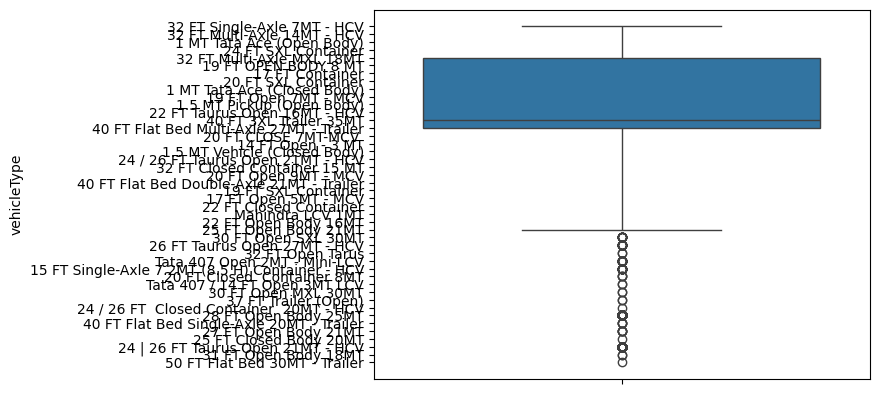

In [329]:
import seaborn as sns
sns.boxplot(df.vehicle)

In [10]:
b4 = data[['vehicleType','Minimum_kms_to_be_covered_in_a_day']].dropna().reset_index().drop(['index'],axis=1)

In [12]:
b4.shape

(2820, 2)

Question:Is there a difference in the minimum kilometers to be covered in a day based on the type of truck?

Answer: Yes, there is a difference between the type of truck and minimum distance for a day.
As seen in the graph below 40 ft (Trailer) trucks need to travel a minimum of 250 km compare to 275 kms for smaller trucks.

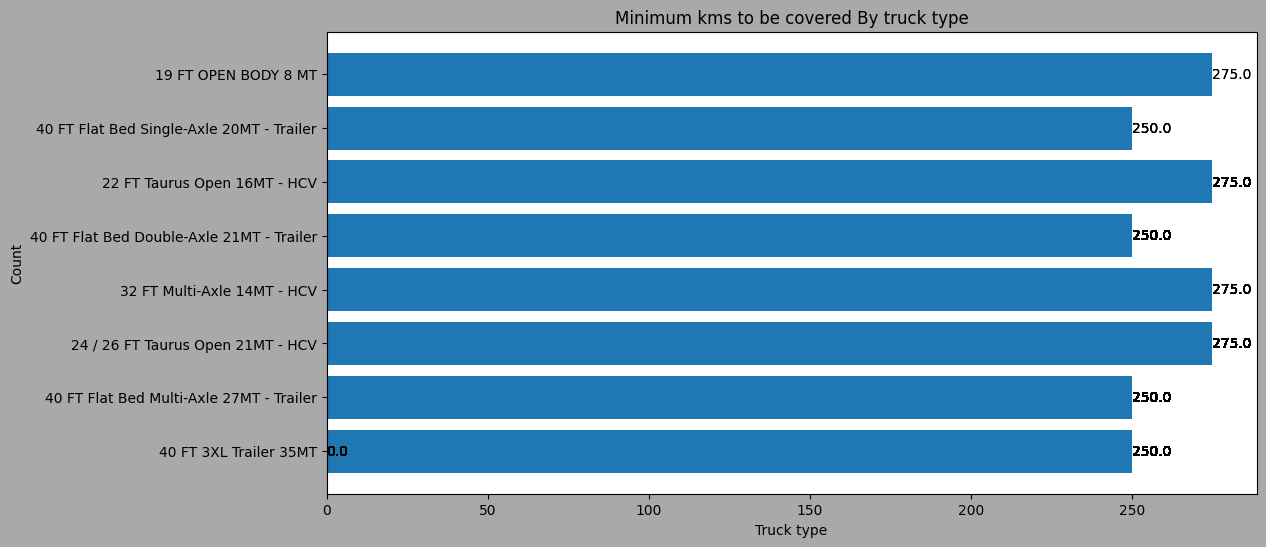

In [315]:
plt.figure(figsize=(12, 6),facecolor='darkgray')
bars = plt.barh(b4['vehicleType'],b4['Minimum_kms_to_be_covered_in_a_day'])
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width}', va='center', ha='left')
plt.title('Minimum kms to be covered By truck type')
plt.xlabel('Truck type')
plt.ylabel('Count')
plt.show()

In [91]:
b3

,Driver_Name,actual_eta,Planned_ETA,trip_end_date,trip_start_date,actual_delay
0,NaN,2020-08-28 14:38:04.447,2020-08-21 18:59:01.000,NaN,2020-08-17 14:59:01,6 days 19:39:03.447000
1,RAMESH,2020-08-28 12:46:17.007,2020-08-31 20:22:22.827,NaN,2020-08-27 16:21:52,-4 days +16:23:54.180000
2,GIRI,2020-08-28 16:03:30.793,2020-08-31 21:59:24.987,NaN,2020-08-27 17:57:04,-4 days +18:04:05.806000
3,RAVI,2020-08-28 12:50:27.997,2020-09-01 04:48:24.503,NaN,2020-08-28 00:47:45,-4 days +08:02:03.494000
4,TAMIL,2020-08-28 14:22:50.127,2020-09-01 05:23:19.243,NaN,2020-08-28 01:13:48,-4 days +08:59:30.884000
...,...,...,...,...,...,...
6875,NaN,2019-03-27 17:46:00.000,2019-03-27 18:31:00.000,2019-03-27 17:46:00,2019-03-27 18:00:00,-1 days +23:15:00
6876,NaN,2019-03-31 19:51:00.000,2019-03-31 20:36:00.000,2019-03-31 19:51:00,2019-03-31 17:30:00,-1 days +23:15:00
6877,NaN,2019-03-30 00:53:00.000,2019-03-30 01:38:00.000,2019-03-30 00:53:00,2019-03-29 20:44:00,-1 days +23:15:00
6878,NaN,2019-03-27 16:35:00.000,2019-03-27 17:20:00.000,2019-03-27 16:35:00,2019-03-27 15:29:00,-1 days +23:15:00


In [92]:
b3.loc[:,'arrival_tag'] = b3['actual_delay'].apply(lambda x: (
    'ontime' if pd.isnull(x) or (x.components.days == 0 and x.components.hours == 0)
    else ('delayed' if x < pd.Timedelta(0)
          else 'early' if x > pd.Timedelta(0)
          else 'unknown')
))
b3.loc[:,'actual_delay'] = b3['actual_eta'] - b3['Planned_ETA']


C:\Users\dayal\AppData\Local\Temp\ipykernel_16064\4099803047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b3.loc[:,'arrival_tag'] = b3['actual_delay'].apply(lambda x: (


In [298]:
b3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Driver_Name      3451 non-null   object         
 1   actual_eta       6843 non-null   datetime64[ns] 
 2   Planned_ETA      6880 non-null   datetime64[ns] 
 3   trip_end_date    6686 non-null   object         
 4   trip_start_date  6880 non-null   object         
 5   actual_delay     6843 non-null   timedelta64[ns]
 6   arrival_tag      6880 non-null   object         
dtypes: datetime64[ns](2), object(4), timedelta64[ns](1)
memory usage: 376.4+ KB


In [93]:
driver_counts = b3.groupby(['Driver_Name', 'arrival_tag']).size().unstack(fill_value=0)
driver_counts['total_trips'] = driver_counts.sum(axis=1)
driver_counts['percentage_ontime'] = driver_counts.apply(lambda row: ((row['ontime'] + row['early']) / row['total_trips']) * 100, axis=1)
print(driver_counts['percentage_ontime'].unique())

b3[['arrival_tag','Driver_Name']].groupby(['Driver_Name']).groups

In [98]:
driver_counts


arrival_tag,delayed,early,ontime,total_trips,percentage_ontime
Driver_Name,,,,,
V BABU,1,0,0,1,0.0
A C SEKHARA RAO,0,1,0,1,100.0
A DHANDAPANI,0,1,0,1,100.0
A Gopal,0,1,0,1,100.0
AABID,2,8,0,10,80.0
...,...,...,...,...,...
salim,0,1,0,1,100.0
sandeep kumar,0,1,0,1,100.0
thippaswamy nayak K T,2,0,0,2,0.0


In [ ]:
top_5_drivers = driver_counts.nlargest(5, 'percentage_ontime')


Below here is a list of top 5 drivers by ontime or early delivery

In [ ]:
list(top_5_drivers.index)

['A C SEKHARA RAO', 'A DHANDAPANI', 'A Gopal', 'AAKASH PAWAR', 'AAS MOHAMMAD']

In [ ]:
data.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

,Driver_Name,actual_eta,Planned_ETA,trip_end_date,trip_start_date,actual_delay,arrival_tag
0,NaN,2020-08-28 14:38:04.447,2020-08-21 18:59:01.000,NaN,2020-08-17 14:59:01,6 days 19:39:03.447000,early
1,RAMESH,2020-08-28 12:46:17.007,2020-08-31 20:22:22.827,NaN,2020-08-27 16:21:52,-4 days +16:23:54.180000,delayed
2,GIRI,2020-08-28 16:03:30.793,2020-08-31 21:59:24.987,NaN,2020-08-27 17:57:04,-4 days +18:04:05.806000,delayed
3,RAVI,2020-08-28 12:50:27.997,2020-09-01 04:48:24.503,NaN,2020-08-28 00:47:45,-4 days +08:02:03.494000,delayed
4,TAMIL,2020-08-28 14:22:50.127,2020-09-01 05:23:19.243,NaN,2020-08-28 01:13:48,-4 days +08:59:30.884000,delayed
...,...,...,...,...,...,...,...
6875,NaN,2019-03-27 17:46:00.000,2019-03-27 18:31:00.000,2019-03-27 17:46:00,2019-03-27 18:00:00,-1 days +23:15:00,delayed
6876,NaN,2019-03-31 19:51:00.000,2019-03-31 20:36:00.000,2019-03-31 19:51:00,2019-03-31 17:30:00,-1 days +23:15:00,delayed
6877,NaN,2019-03-30 00:53:00.000,2019-03-30 01:38:00.000,2019-03-30 00:53:00,2019-03-29 20:44:00,-1 days +23:15:00,delayed
6878,NaN,2019-03-27 16:35:00.000,2019-03-27 17:20:00.000,2019-03-27 16:35:00,2019-03-27 15:29:00,-1 days +23:15:00,delayed


In [120]:
b2 = b3.join(data[['TRANSPORTATION_DISTANCE_IN_KM']])

In [100]:
b2 = data[['TRANSPORTATION_DISTANCE_IN_KM']].merge(b3[['arrival_tag']], on=data.index)


In [122]:
correlation = b2['TRANSPORTATION_DISTANCE_IN_KM'].corr(b2['actual_delay'],)

In [123]:
correlation

-0.037167198511125515

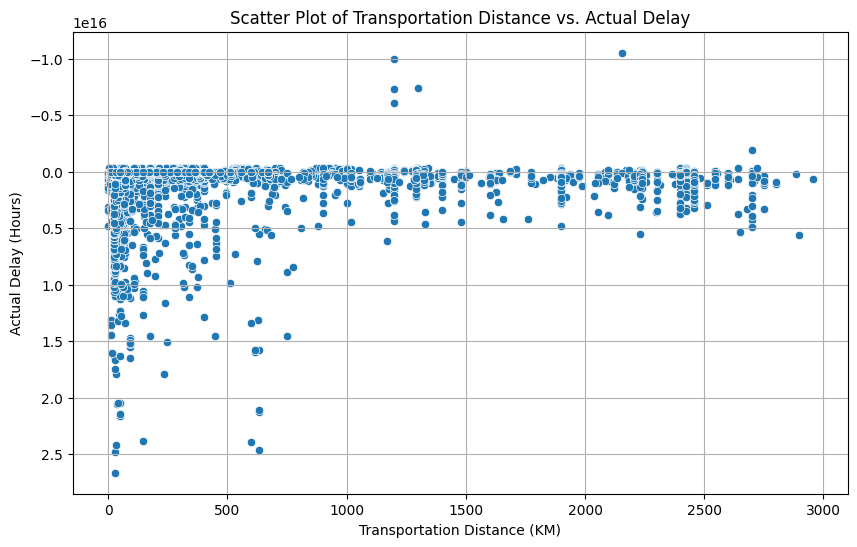

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TRANSPORTATION_DISTANCE_IN_KM', y='actual_delay', data=b2)
plt.title('Scatter Plot of Transportation Distance vs. Actual Delay')
plt.xlabel('Transportation Distance (KM)')
plt.ylabel('Actual Delay (Hours)')
plt.grid(True)
plt.show()

In [125]:
import seaborn as sns

In [133]:
b2['delay_hours'] = b2['actual_delay'].apply(lambda x : x.total_seconds()/3600)

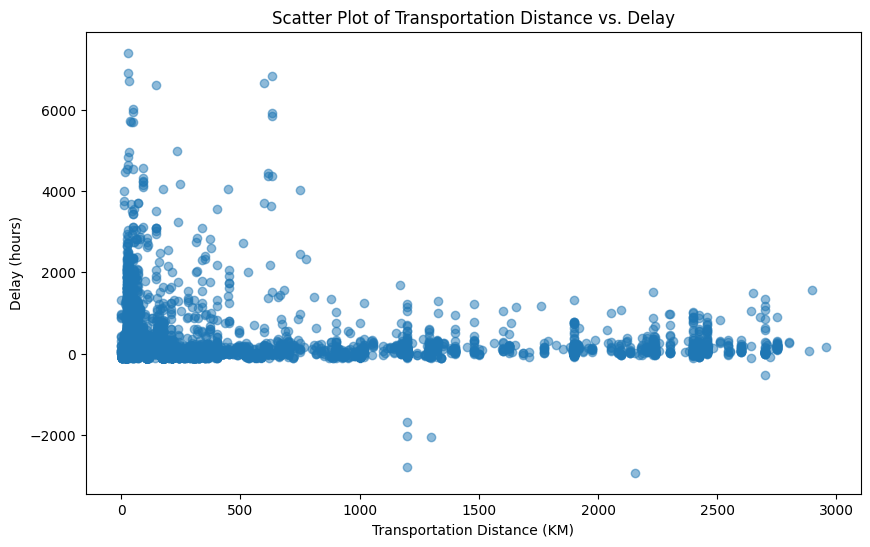

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(b2['TRANSPORTATION_DISTANCE_IN_KM'], b2['delay_hours'], alpha=0.5)
plt.title('Scatter Plot of Transportation Distance vs. Delay')
plt.xlabel('Transportation Distance (KM)')
plt.ylabel('Delay (hours)')
plt.show()


In [136]:
b2[['TRANSPORTATION_DISTANCE_IN_KM','delay_hours']].corr()

,TRANSPORTATION_DISTANCE_IN_KM,delay_hours
TRANSPORTATION_DISTANCE_IN_KM,1.000000,-0.115204
delay_hours,-0.115204,1.000000


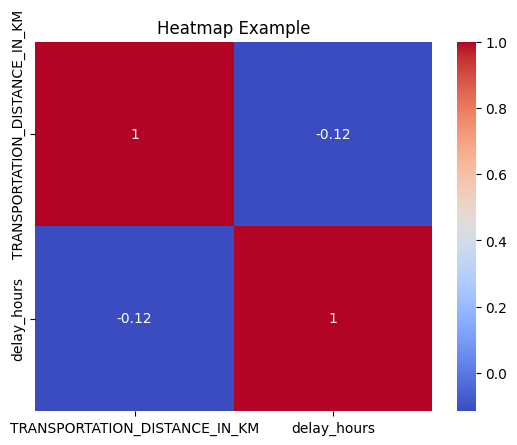

In [137]:
sns.heatmap(b2[['TRANSPORTATION_DISTANCE_IN_KM','delay_hours']].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap Example")
plt.show()

In [151]:
data.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')

In [152]:
data.head()

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [143]:
data['Data_Ping_time'][0].date()

datetime.date(2020, 8, 24)

In [161]:
b1 = data[['BookingID_Date','Origin_Location','Destination_Location','Market/Regular ','Material Shipped']]

In [162]:
b1.loc[:,'Origin_State'] = b1['Origin_Location'].apply(lambda x: x.split(',')[-1])

C:\Users\dayal\AppData\Local\Temp\ipykernel_16064\3652067803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1.loc[:,'Origin_State'] = b1['Origin_Location'].apply(lambda x: x.split(',')[-1])


In [163]:
b1.loc[:,'Destination_State'] = b1['Destination_Location'].apply(lambda x: x.split(',')[-1])

C:\Users\dayal\AppData\Local\Temp\ipykernel_16064\929876873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1.loc[:,'Destination_State'] = b1['Destination_Location'].apply(lambda x: x.split(',')[-1])


In [172]:
b1.loc[:,'Booking_Date'] = b1['BookingID_Date'].dt.date

C:\Users\dayal\AppData\Local\Temp\ipykernel_16064\3245186346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1.loc[:,'Booking_Date'] = b1['BookingID_Date'].dt.date


In [173]:
b1.loc[:,'Regular'] = b1['Market/Regular '].map({'Regular':1,'Market':0})

In [174]:
b1

,BookingID,BookingID_Date,Origin_Location,Destination_Location,Market/Regular,Material Shipped,Origin_State,Destination_State,Regular,Booking_Date
0,MVCV0000927/082021,2020-08-17,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",Market,BRACKET / GRAB HANDLE,TAMIL NADU,KARNATAKA,0,2020-08-17
1,VCV00014271/082021,2020-08-27,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",Regular,ZB MODEL PLATE / 3143,TAMIL NADU,TAMIL NADU,1,2020-08-27
2,VCV00014382/082021,2020-08-27,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",Regular,LETTERING / FUSO,PONDICHERRY,PONDICHERRY,1,2020-08-27
3,VCV00014743/082021,2020-08-28,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",Regular,LU STRUT RA / RADIUS ROD,TAMIL NADU,TAMIL NADU,1,2020-08-28
4,VCV00014744/082021,2020-08-28,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",Regular,WISHBONE / V ROD/HDT,PONDICHERRY,PONDICHERRY,1,2020-08-28
...,...,...,...,...,...,...,...,...,...,...
6875,WDSBKTP42751,2019-03-27,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka",Regular,TOOL KIT SET,Karnataka,Karnataka,1,2019-03-27
6876,WDSBKTP43203,2019-03-31,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...",Regular,CONTROL LEVER ASSY,Karnataka,Karnataka,1,2019-03-31
6877,WDSBKTP43021,2019-03-29,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka",Regular,SPARE PARTS AUTOMOBILE,Karnataka,Karnataka,1,2019-03-29
6878,WDSBKTP42685,2019-03-27,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka",Regular,SPARE PARTS AUTOMOBILE,Karnataka,Karnataka,1,2019-03-27


In [176]:
date_counts = b1.groupby(b1['Booking_Date']).size()

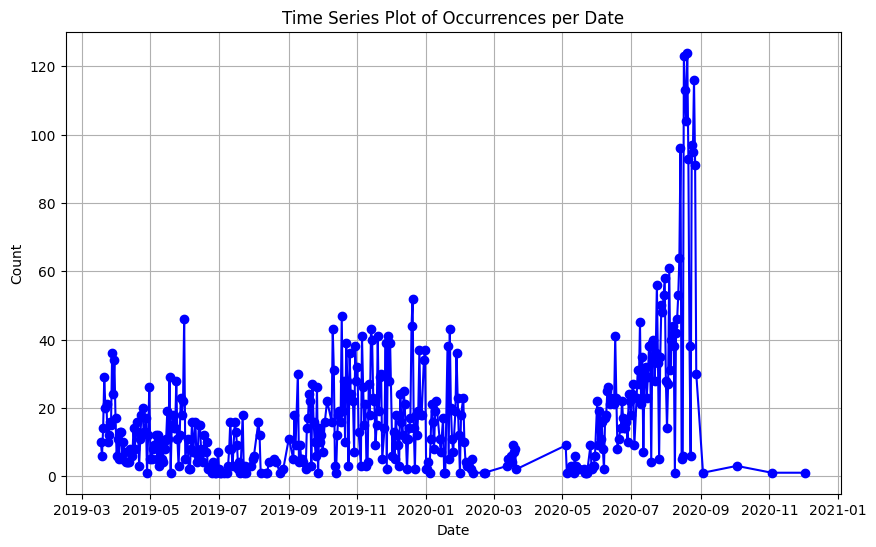

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series Plot of Occurrences per Date')
plt.grid(True)
plt.show()

In [181]:
! pip install prophet

  Using cached holidays-0.49-py3-none-any.whl.metadata (23 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 653.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 1.3 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.5 MB/s eta 0:00:09
    --------------------------------------- 0.3/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.4/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/13.3 MB 2.2 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/13.3 MB 2.3 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/13.3 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.1/13.3 MB 2.4 MB/s eta 0:00:06
   --- ---------------------------

In [182]:
b1

,BookingID,BookingID_Date,Origin_Location,Destination_Location,Market/Regular,Material Shipped,Origin_State,Destination_State,Regular,Booking_Date
0,MVCV0000927/082021,2020-08-17,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",Market,BRACKET / GRAB HANDLE,TAMIL NADU,KARNATAKA,0,2020-08-17
1,VCV00014271/082021,2020-08-27,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",Regular,ZB MODEL PLATE / 3143,TAMIL NADU,TAMIL NADU,1,2020-08-27
2,VCV00014382/082021,2020-08-27,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",Regular,LETTERING / FUSO,PONDICHERRY,PONDICHERRY,1,2020-08-27
3,VCV00014743/082021,2020-08-28,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",Regular,LU STRUT RA / RADIUS ROD,TAMIL NADU,TAMIL NADU,1,2020-08-28
4,VCV00014744/082021,2020-08-28,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",Regular,WISHBONE / V ROD/HDT,PONDICHERRY,PONDICHERRY,1,2020-08-28
...,...,...,...,...,...,...,...,...,...,...
6875,WDSBKTP42751,2019-03-27,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka",Regular,TOOL KIT SET,Karnataka,Karnataka,1,2019-03-27
6876,WDSBKTP43203,2019-03-31,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...",Regular,CONTROL LEVER ASSY,Karnataka,Karnataka,1,2019-03-31
6877,WDSBKTP43021,2019-03-29,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka",Regular,SPARE PARTS AUTOMOBILE,Karnataka,Karnataka,1,2019-03-29
6878,WDSBKTP42685,2019-03-27,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka",Regular,SPARE PARTS AUTOMOBILE,Karnataka,Karnataka,1,2019-03-27


In [201]:
daily_demand = b1.groupby('BookingID_Date')['BookingID'].count().reset_index()

In [202]:
daily_demand.rename(columns={'BookingID_Date': 'ds', 'BookingID': 'y'}, inplace=True)

In [203]:
daily_demand

,ds,y
0,2019-03-18,10
1,2019-03-19,6
2,2019-03-20,14
3,2019-03-21,29
4,2019-03-22,20
...,...,...
383,2020-08-28,30
384,2020-09-03,1
385,2020-10-03,3
386,2020-11-03,1


In [215]:
def fplot(forecast):
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.title('Demand Forecast for the Next 3 Months')
    plt.show()

In [230]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(daily_demand)

# Create a future dataframe for the next 3 months
future = model.make_future_dataframe(periods=90)

# Generate forecasts
forecast_prophet = model.predict(future)

# Plot the forecast


# Display the last 3 forecasted values
# print(forecast[['ds', 'yhat']].tail(3))


22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] done processing


In [224]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(daily_demand['y'], lags=1)
model_fit = model.fit()
forecast_ar_model = model_fit.predict(start=len(daily_demand), end=len(daily_demand) + 2)


In [223]:
# fplot(forecast)

In [225]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(daily_demand['y'], order=(4,1,3))
model_fit = model.fit()
forecast_arima = model_fit.predict(start=len(daily_demand), end=len(daily_demand) + 2)


Actual demand over analyzed period

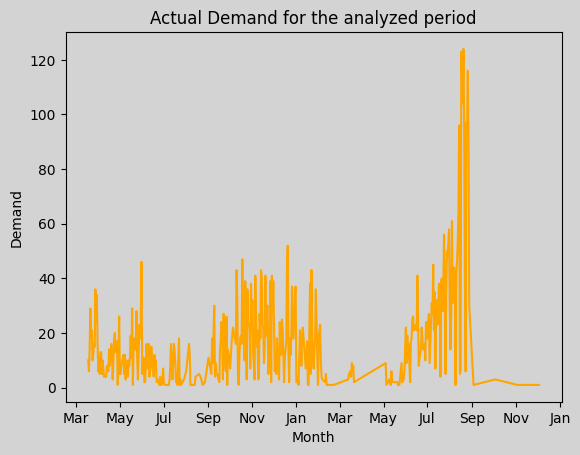

In [316]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(facecolor='lightgray')
plt.gca().set_facecolor('lightgray')

plt.plot(daily_demand['ds'], daily_demand['y'], label='Actual Demand', color='orange')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format: Month Day
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Actual Demand for the analyzed period')
plt.show()

Forecasting for next three months

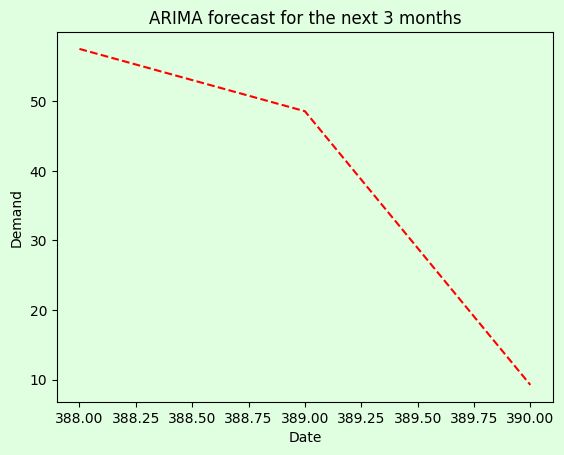

In [317]:
plt.figure(facecolor='#E0FFE0')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.gca().set_facecolor('#E0FFE0')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title(f'ARIMA forecast for the next 3 months')
plt.show()

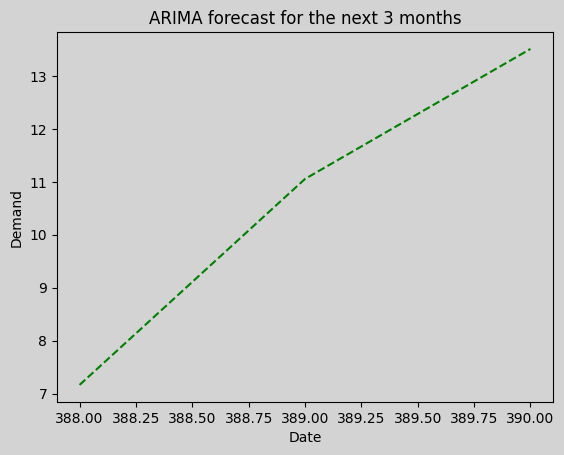

In [318]:
plt.figure(facecolor='lightgray')
plt.plot(forecast_ar_model.index, forecast_ar_model, label='AR Model Forecast', linestyle='--', color='green')
plt.gca().set_facecolor('lightgray')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title(f'ARIMA forecast for the next 3 months')
plt.show()

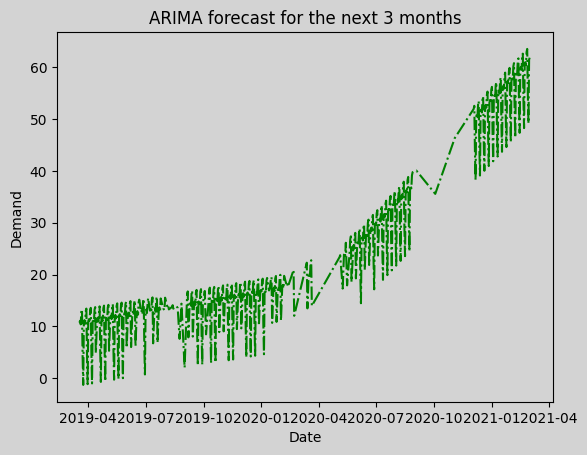

In [319]:
plt.figure(facecolor='lightgray')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast', linestyle='-.', color='green')
plt.gca().set_facecolor('lightgray')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title(f'ARIMA forecast for the next 3 months')
plt.show()